<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/4_model_comparison_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

## Comparacion de modelos binarios

**Natalia Dedandi**




In [ ]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install datasets seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [ ]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [ ]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)

Traigo el data set y quiero aplicarle el clasificador al conjunto de TEST y de eval

In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [ ]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
from transformers import pipeline

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compute_metrics(labels, predictions):
    metrics = {}
    metrics['Accuracy'] = accuracy_score(labels, predictions)
    metrics['Precision'] = precision_score(labels, predictions)
    metrics['Recall'] = recall_score(labels, predictions)
    metrics['f1'] = f1_score(labels, predictions)
    metrics['AUC'] = roc_auc_score(labels, predictions)

    return(metrics)

Aplico el clasificador binario con fintuning basado en BETO al conjunto de test

In [ ]:


test_texts = ds1['test']['text']
tw_list = list(test_texts)


In [ ]:
specific_model = pipeline(model="natdebandi/beto_hate_speech_ar_bin", device=0)

outputs=specific_model(tw_list)

config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/735k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

In [ ]:
outputs[10]

{'label': 'LABEL_0', 'score': 0.9998283386230469}

In [ ]:
df_beto = pd.DataFrame(outputs)



In [ ]:
df_beto['HATEFUL_pred'] = df_beto['label'].apply(lambda x: 0 if x == 'LABEL_0' else 1)

In [ ]:
df_beto[20:30]

,label,score,HATEFUL_pred
20,LABEL_0,0.995678,0
21,LABEL_0,0.999597,0
22,LABEL_0,0.998200,0
23,LABEL_0,0.987661,0
24,LABEL_1,0.999053,1
25,LABEL_0,0.999407,0
26,LABEL_0,0.996082,0
27,LABEL_0,0.999770,0
28,LABEL_0,0.999746,0
29,LABEL_0,0.999678,0


In [ ]:
df_test = pd.DataFrame(ds1['test'])[['id','text','HATEFUL']]


In [ ]:
df_test[1:10]

,id,text,HATEFUL
1,397704,@usuario Faltó que se enganchó al hijo de sofo...,1
2,397705,"@usuario y bue, que le vaya a llorar a Cristin...",0
3,397706,@usuario @usuario Jodete. Macri te hizo conoce...,0
4,397707,"@usuario Que se joda, es su gobierno el que el...",0
5,397708,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",0
6,397709,@usuario Que se joda,0
7,397710,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,0
8,397711,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,0
9,397712,@usuario TUGO,0


In [ ]:
# prompt: merge df_test with df_beto

df_test_beto = pd.merge(df_test, df_beto, left_index=True, right_index=True)


In [ ]:
df_test_beto[20:30]

,id,text,HATEFUL,label,score,HATEFUL_pred
20,397723,@usuario Votó eso.,0,LABEL_0,0.995678,0
21,397724,"@usuario Para lo poco que hacía,",0,LABEL_0,0.999597,0
22,397725,@usuario Estashi!!!,0,LABEL_0,0.998200,0
23,397726,@usuario @usuario El conchero...después que vo...,0,LABEL_0,0.987661,0
24,397727,@usuario Negra cabeza,1,LABEL_1,0.999053,1
25,397728,@usuario 🤣🤣🤣a comer polenta genia del voto,0,LABEL_0,0.999407,0
26,397729,@usuario No siento pena \nFuiste Voto K ?\nBan...,0,LABEL_0,0.996082,0
27,397730,@usuario Otra chorra K,0,LABEL_0,0.999770,0
28,397731,@usuario Otro logro más de @usuario,0,LABEL_0,0.999746,0
29,397732,@usuario Pero vota kirchnerismo,0,LABEL_0,0.999678,0


<ipython-input-38-795cedd03820>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_test_beto, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')


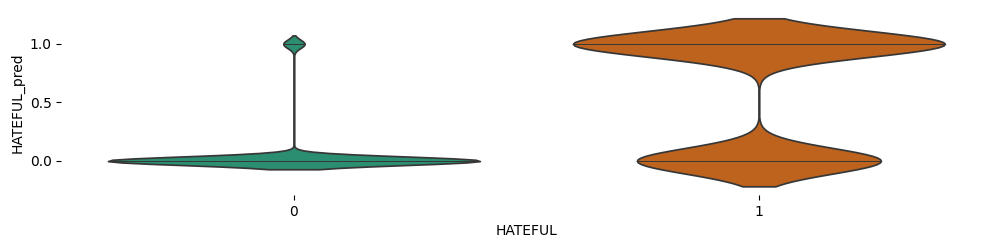

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test_beto['HATEFUL_pred'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test_beto, x='HATEFUL', y='HATEFUL_pred', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#def compute_metrics(labels, prediction):
metrics_beto_bin=compute_metrics(df_test_beto['HATEFUL'], df_test_beto['HATEFUL_pred'])
metrics_beto_bin

{'Accuracy': 0.891563078550648,
 'Precision': 0.6768558951965066,
 'Recall': 0.6037840845854201,
 'f1': 0.6382352941176471,
 'AUC': 0.7747602593469737}

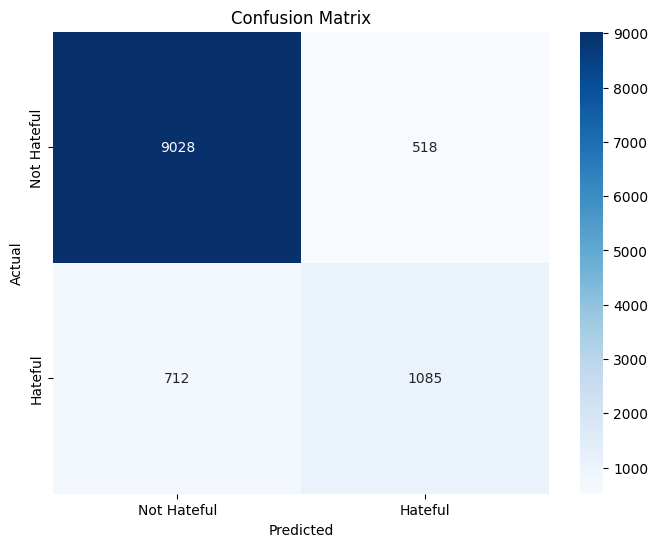

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(df_test_beto['HATEFUL'],df_test_beto['HATEFUL_pred'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hateful', 'Hateful'],
            yticklabels=['Not Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TRAIGO EL BATCH DEL TRABAJO DE CLASIFICACION BINARIA CON GPT 4 MINI YA HECHO

'batch_gOkX3xcR4maDJN8sxd86kvmi'

In [ ]:
batch_job = client.batches.retrieve('batch_gOkX3xcR4maDJN8sxd86kvmi')


In [ ]:
output_file_id = batch_job.output_file_id

if output_file_id:
		outputs = client.files.content(output_file_id).content
		result_file_name = "outputs.jsonl"

		with open(result_file_name, 'wb') as file:
		    file.write(outputs)

In [ ]:
data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_GPT4= pd.DataFrame(data_results)

In [ ]:
df_GPT4["id"] = pd.to_numeric(df_GPT4["id"])

In [ ]:
df_GPT4[20:30]

,id,sentiment_gpt
20,397723,Not hateful
21,397724,not hateful
22,397725,not hateful
23,397726,Hateful
24,397727,Hateful
25,397728,Not hateful
26,397729,Not hateful
27,397730,Hateful
28,397731,Not hateful
29,397732,Not hateful


In [ ]:
#junto los dos dataframes

#df_test_beto = pd.merge(df_test, df_beto, left_index=True, right_index=True)
df_test_gpt4=df_test.merge(df_GPT4, on='id', how='left')

In [ ]:
df_test_gpt4[20:30]

,id,text,HATEFUL,sentiment_gpt
20,397723,@usuario Votó eso.,0,Not hateful
21,397724,"@usuario Para lo poco que hacía,",0,not hateful
22,397725,@usuario Estashi!!!,0,not hateful
23,397726,@usuario @usuario El conchero...después que vo...,0,Hateful
24,397727,@usuario Negra cabeza,1,Hateful
25,397728,@usuario 🤣🤣🤣a comer polenta genia del voto,0,Not hateful
26,397729,@usuario No siento pena \nFuiste Voto K ?\nBan...,0,Not hateful
27,397730,@usuario Otra chorra K,0,Hateful
28,397731,@usuario Otro logro más de @usuario,0,Not hateful
29,397732,@usuario Pero vota kirchnerismo,0,Not hateful


In [ ]:
df_test_gpt4['HATEFUL_gpt4'] = df_test_gpt4['sentiment_gpt'].apply(lambda x: 1 if (x=='hateful' or x=='Hateful') else 0)
df_test_gpt4.groupby(['HATEFUL_gpt4']).size()

,0
HATEFUL_gpt4,
0,6511
1,4832


<ipython-input-56-9fdb612b8933>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_test_gpt4, x='HATEFUL', y='HATEFUL_gpt4', inner='stick', palette='Dark2')


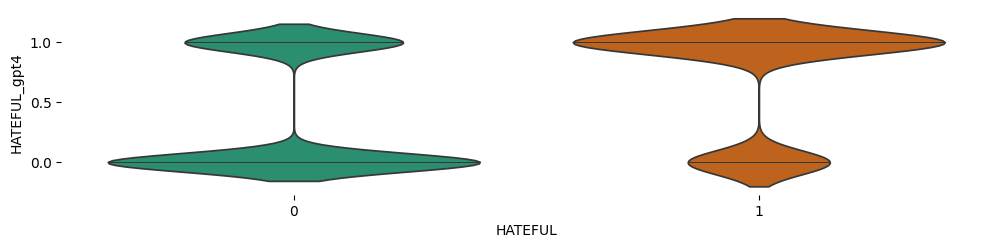

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test_gpt4['HATEFUL_gpt4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test_gpt4, x='HATEFUL', y='HATEFUL_gpt4', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#def compute_metrics(labels, prediction):
metrics_gpt4_bin=compute_metrics(df_test_gpt4['HATEFUL'], df_test_gpt4['HATEFUL_gpt4'])
metrics_gpt4_bin

{'Accuracy': 0.6448029621793177,
 'Precision': 0.26903973509933776,
 'Recall': 0.7234279354479688,
 'f1': 0.3922160205159149,
 'AUC': 0.6767150152831716}

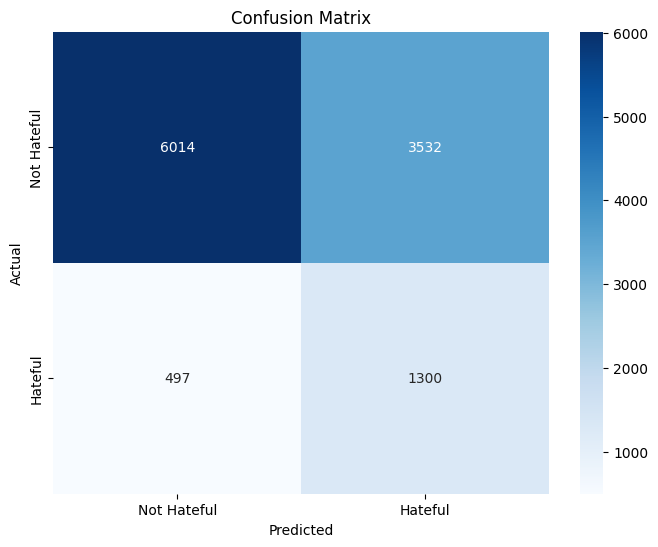

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(df_test_gpt4['HATEFUL'],df_test_gpt4['HATEFUL_gpt4'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hateful', 'Hateful'],
            yticklabels=['Not Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

TRAIGO EL BATCH DE LA CLASIFICACION HECHA CON EL GPT 3.5 CON FINETUNNING


In [ ]:

batch_job = client.batches.retrieve('batch_271qia5twF7qcZNp5AqG9T31')


In [ ]:
output_file_id = batch_job.output_file_id

if output_file_id:
		outputs = client.files.content(output_file_id).content
		result_file_name = "outputs.jsonl"

		with open(result_file_name, 'wb') as file:
		    file.write(outputs)

In [ ]:
data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_GPT3_ft= pd.DataFrame(data_results)

In [ ]:
df_GPT3_ft["id"] = pd.to_numeric(df_GPT3_ft["id"])

In [ ]:
df_test_gpt3=df_test.merge(df_GPT3_ft, on='id', how='left')

In [ ]:
df_test_gpt3['HATEFUL_gpt3'] = df_test_gpt3['sentiment_gpt'].apply(lambda x: 1 if (x=='hateful' or x=='Hateful') else 0)
df_test_gpt3.groupby(['HATEFUL_gpt3']).size()

,0
HATEFUL_gpt3,
0,9776
1,1567


<ipython-input-71-4a4be1491e64>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_test_gpt3, x='HATEFUL', y='HATEFUL_gpt3', inner='stick', palette='Dark2')


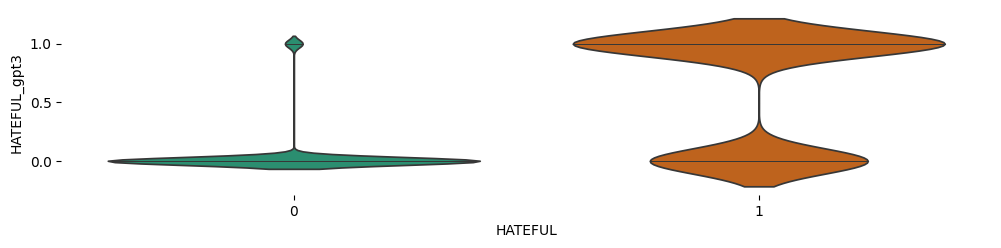

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_test_gpt3['HATEFUL_gpt3'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_test_gpt3, x='HATEFUL', y='HATEFUL_gpt3', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
metrics_gpt3_bin=compute_metrics(df_test_gpt3['HATEFUL'], df_test_gpt3['HATEFUL_gpt3'])
metrics_gpt3_bin

{'Accuracy': 0.903200211584237,
 'Precision': 0.7230376515634971,
 'Recall': 0.6304952698942682,
 'f1': 0.6736028537455411,
 'AUC': 0.7925156005871927}

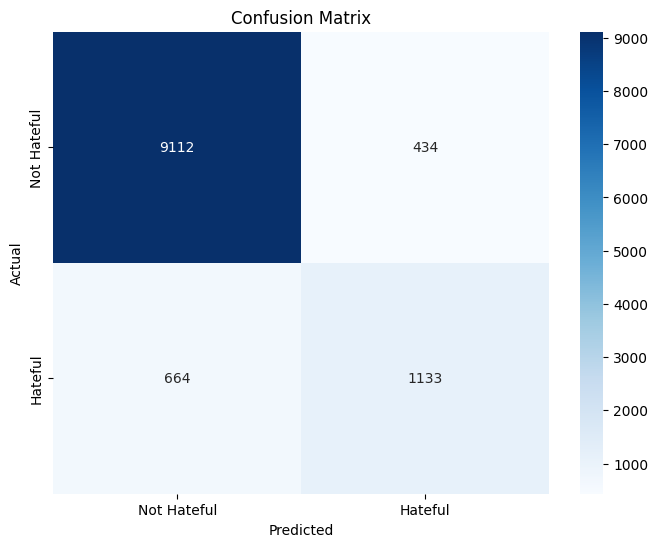

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(df_test_gpt3['HATEFUL'],df_test_gpt3['HATEFUL_gpt3'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Hateful', 'Hateful'],
            yticklabels=['Not Hateful', 'Hateful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

CREO UN DATAFRAME CON TODAS LAS PREDICCIONES Y LO GUARDO en csv

In [ ]:

# Merge the three DataFrames
merged_df = df_test_beto.merge(df_test_gpt3[['id', 'HATEFUL_gpt3']], on='id', how='left').merge(df_test_gpt4[['id', 'HATEFUL_gpt4']], on='id', how='left')
merged_df = merged_df.drop(columns=['label', 'score'])
merged_df[10:20]


,id,text,HATEFUL,HATEFUL_pred,HATEFUL_gpt3,HATEFUL_gpt4
10,397713,@usuario Jajajaja lo que hace la soberbia....,0,0,0,0
11,397714,@usuario PUCHA!!!,0,0,0,0
12,397715,@usuario Lo siento oero me alegro eso se llama...,0,0,0,0
13,397716,@usuario Y bue... las viejas glorias de mis te...,0,0,0,0
14,397717,@usuario Jodete!! Vos los votaste,0,0,0,1
15,397718,@usuario Y que de paso se vaya a vivir a cdsm ...,0,0,0,1
16,397719,@usuario A chuparla,0,0,0,1
17,397720,@usuario pobre! la que estaba en primera fila ...,0,0,0,1
18,397721,@usuario TU GOBIERNO @usuario,0,0,0,0
19,397722,@usuario TUGO,0,0,0,0


In [ ]:
# Save the merged DataFrame to a CSV file
merged_df.to_csv('binary_predictions.csv', index=False)

Tomo algunos ejemplos para ver como funciona la clasificacion

In [ ]:
# prompt: list 15 rows that have 1 in al least one of the HATEFUL columns in merged_df

examples=merged_df[(merged_df['HATEFUL'] == 1) | (merged_df['HATEFUL_pred'] == 1) | (merged_df['HATEFUL_gpt3'] == 1) | (merged_df['HATEFUL_gpt4'] == 1)].head(30)


In [ ]:
examples

,id,text,HATEFUL,HATEFUL_pred,HATEFUL_gpt3,HATEFUL_gpt4
0,397703,@usuario Ojalá se funda y cague de hambre,0,0,0,1
1,397704,@usuario Faltó que se enganchó al hijo de sofo...,1,0,0,0
2,397705,"@usuario y bue, que le vaya a llorar a Cristin...",0,0,0,1
3,397706,@usuario @usuario Jodete. Macri te hizo conoce...,0,0,0,1
4,397707,"@usuario Que se joda, es su gobierno el que el...",0,0,0,1
5,397708,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",0,0,0,1
6,397709,@usuario Que se joda,0,0,0,1
7,397710,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,0,0,0,1
14,397717,@usuario Jodete!! Vos los votaste,0,0,0,1
15,397718,@usuario Y que de paso se vaya a vivir a cdsm ...,0,0,0,1


In [ ]:


examples.to_csv('examples_binary_predictions.csv', index=False)
